# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span>


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

Below I show a picture of estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ and their uncertainties with $N_{throws} = 10^6$ as a function of the number of blocks $N_{blocks}$.  
Some comments:
- The mean value is expressed in Bohr radius units.  
- Both Uniform and Gaussian transitions probability's step is tuned so to achieve nearly $50%$ acceptance rate.  
- The estimation of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ and their uncertainties does change noticeably changing the transition probability.
- The reported choices of $N_{throws}$ and $N_{blocks}$ imply that each block is $10^4$ steps long. This choice is briefly commented at the end of the notebook.
- I chose (0,0,0) as the starting point motivated by the isotropy of the 1s square wavefunction and the residual inversion simmetry of the 2p square wavefunction

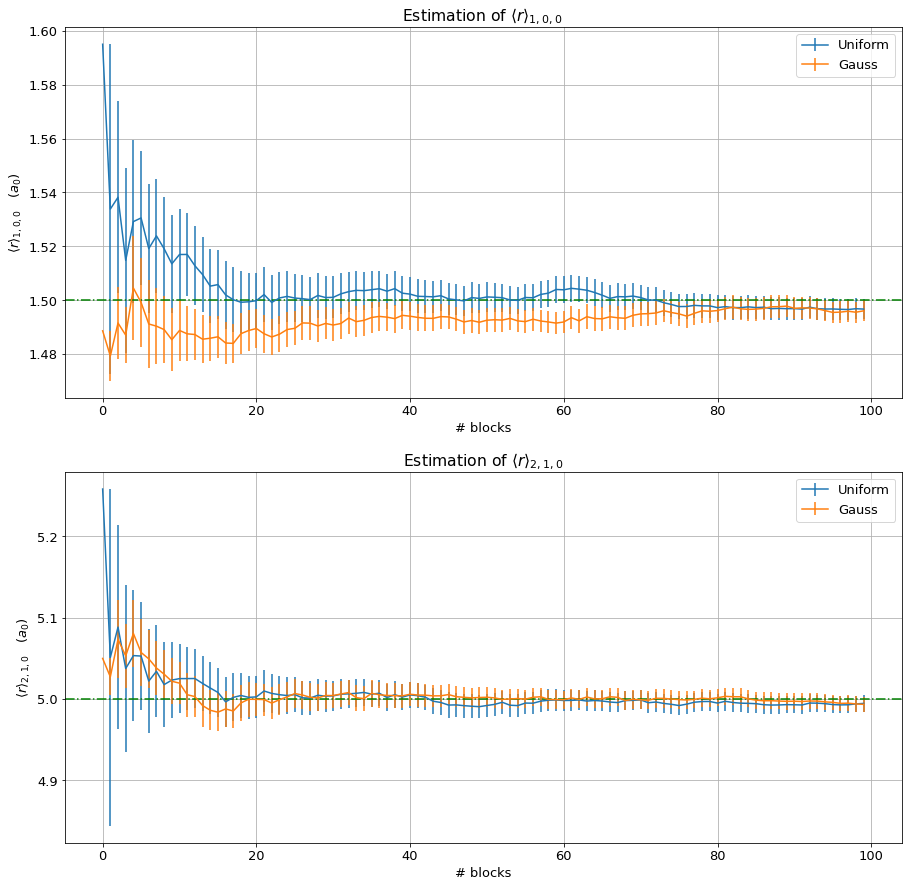

In [7]:
plt.rcParams.update({'font.size': 13})


plt.figure( figsize=(15,15) )

plt.subplot(211)
X, SUM, ERR = np.loadtxt("Uniform1s.txt", unpack=True, usecols=[0,1,2])
plt.errorbar(X, SUM, yerr=ERR, label="Uniform")

X, SUM, ERR = np.loadtxt(  "Gauss1s.txt", unpack=True, usecols=[0,1,2])
plt.errorbar(X, SUM, yerr=ERR,label="Gauss")

plt.axhline(y=1.5, color='g', linestyle='-.')
plt.title(r'Estimation of $\langle r \rangle_{1,0,0}$ ')
plt.xlabel('# blocks')
plt.ylabel(r'$\langle r \rangle_{1,0,0}\quad(a_0)$')
plt.grid(True)
plt.legend()

plt.subplot(212)
X, SUM, ERR = np.loadtxt("Uniform2p.txt", unpack=True, usecols=[0,1,2])
plt.errorbar(X, SUM, yerr=ERR,label="Uniform")

X, SUM, ERR = np.loadtxt(  "Gauss2p.txt", unpack=True, usecols=[0,1,2])
plt.errorbar(X, SUM, yerr=ERR,label="Gauss")

plt.axhline(y=5, color='g', linestyle='-.')
plt.title(r'Estimation of $\langle r \rangle_{2,1,0}$')
plt.xlabel('# blocks')
plt.ylabel(r'$\langle r \rangle_{2,1,0}\quad(a_0)$')
plt.grid(True)
plt.legend()

plt.show()



The figure below exhibit how if i run a simulation starting from a non optimal initial position not surprisingly the equilibration step last longer, and consequently uncertainities in this initial part of the simulation are bigger.

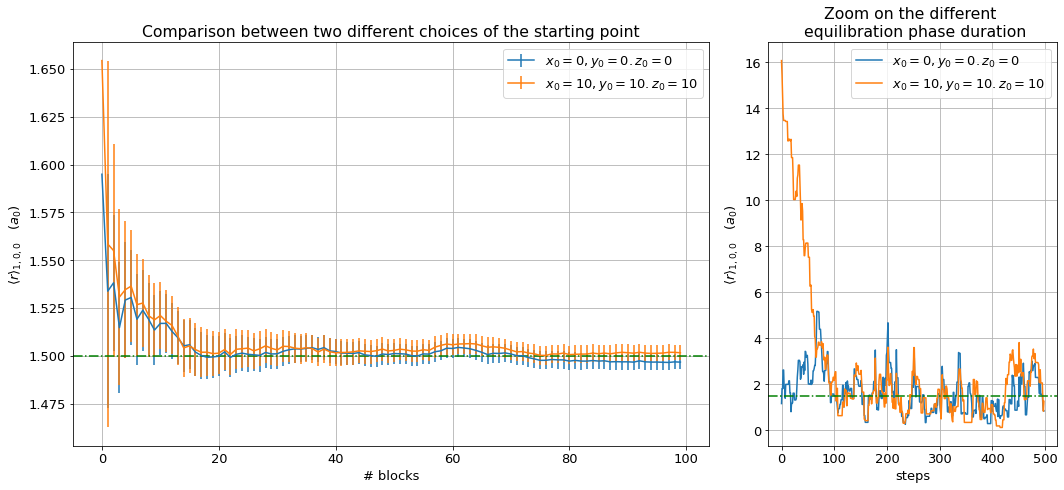

In [8]:
plt.figure( figsize=(15,7) )

plt.subplot2grid((1, 3), (0, 0), colspan=2)

X, SUM, ERR = np.loadtxt("Uniform1s.txt", unpack=True, usecols=[0,1,2])
plt.errorbar(X, SUM, yerr=ERR, label="$x_0=0, y_0=0. z_0=0$")

X, SUM, ERR = np.loadtxt("Uniform1s_far.txt", unpack=True, usecols=[0,1,2])
plt.errorbar(X, SUM, yerr=ERR, label="$x_0=10, y_0=10. z_0=10$")

plt.axhline(y=1.5, color='g', linestyle='-.')
plt.title('Comparison between two different choices of the starting point')
plt.xlabel('# blocks')
plt.ylabel(r'$\langle r \rangle_{1,0,0}\quad(a_0)$')
plt.grid(True)
plt.legend()

plt.subplot2grid((1, 3), (0, 2), colspan=1)

r = np.loadtxt("r1s.txt")
plt.plot(r[1:500], label="$x_0=0, y_0=0. z_0=0$")

r_far = np.loadtxt("r1s_far.txt")
plt.plot(r_far[1:500], label="$x_0=10, y_0=10. z_0=10$")

plt.axhline(y=1.5, color='g', linestyle='-.')
plt.title('Zoom on the different \n equilibration phase duration')
plt.xlabel('steps')
plt.ylabel(r'$\langle r \rangle_{1,0,0}\quad(a_0)$')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()



Below I show a 3D plot for both the PDF sampled.

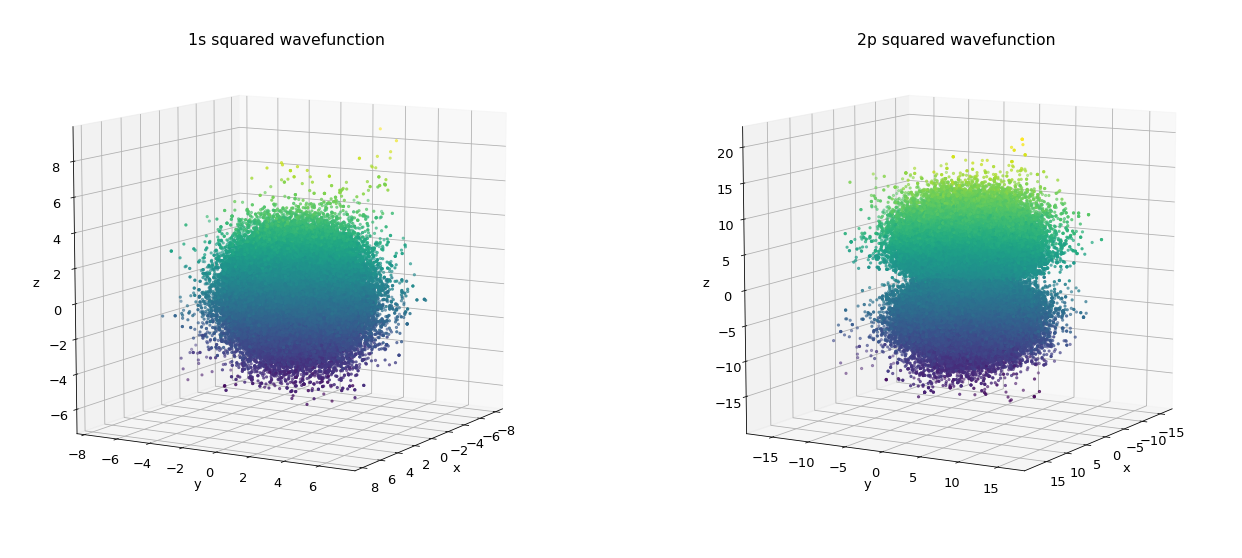

In [9]:
fig = plt.figure(figsize=(22, 10) )
X, Y, Z = np.loadtxt("pos_1s", unpack=True, usecols=[0,1,2])
plt.tight_layout()
ax = fig.add_subplot(121, projection='3d')
#ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_title('1s squared wavefunction')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

X, Y, Z = np.loadtxt("pos_2p", unpack=True, usecols=[0,1,2])
ax = fig.add_subplot(122, projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_title('2p squared wavefunction')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()

### Comments on the block's size

How should I choose the block's size? In order to answer to this question I computed the autocorrelation of the radius measures with the code below:


In [11]:
def autocorrelation(process, tau):
    n = len(process)
    mean = 0.
    for x in process:
        mean += x
    mean /= n
    c = 0.
    for i in range(n - tau):
        c += (process[i] - mean)*(process[i + tau] - mean)
    autocovariance = 0.
    for i in range(n):
        autocovariance += (process[i] - mean)*(process[i] - mean)
    return c / autocovariance

def f(x, tc):
    return np.exp(-x/tc)

x_t=np.loadtxt("r1s.txt")
acx_t=[autocorrelation(x_t[:40000:], t)  for t in range(100)]
popt, popv = curve_fit(f, np.arange(100), acx_t)
print("correlation time for 1s(fit): ", popt)

x_t=np.loadtxt("r2p.txt")
acx_t=[autocorrelation(x_t[:40000:], t)  for t in range(100)]
popt, popv = curve_fit(f, np.arange(100), acx_t)
print("correlation time for 2p(fit): ", popt)

correlation time for 1s(fit):  [9.29516799]
correlation time for 2p(fit):  [10.30412853]


It comes out that correlation length is of the order 10 and thus one should expect that correlation with a measure and the next let's say fifteen measures could be so relevant to prevent application of the CLT for correct uncertainity estimation.  
The blocking method is effective whenever two consecutive blocks are to be considerally practically uncorrelated. This means that correlations length must be at least an order of magnitude less than the block's length. This is assured in this particular case because block's size is $1000$ times the correlation length. 
Anyway i think that choosing block's size of 100 times correlation lenght could have been an equally safe choice.